In [1]:
%load_ext autoreload
%autoreload 2

# Import 

In [2]:
from bosonic import Qubit, CatQubit, BinomialQubit, GKPQubit, execute, BosonicRegister, BosonicCircuit, PhaseRotationGate, CDGate
import numpy as np
import matplotlib.pyplot as plt
import jaxquantum as jqt
import jax.numpy as jnp

# Qubits

/Users/phionx/Github/qc/EQuS/bosonic/jax/bosonic/bosonic/codes/base.py:300: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


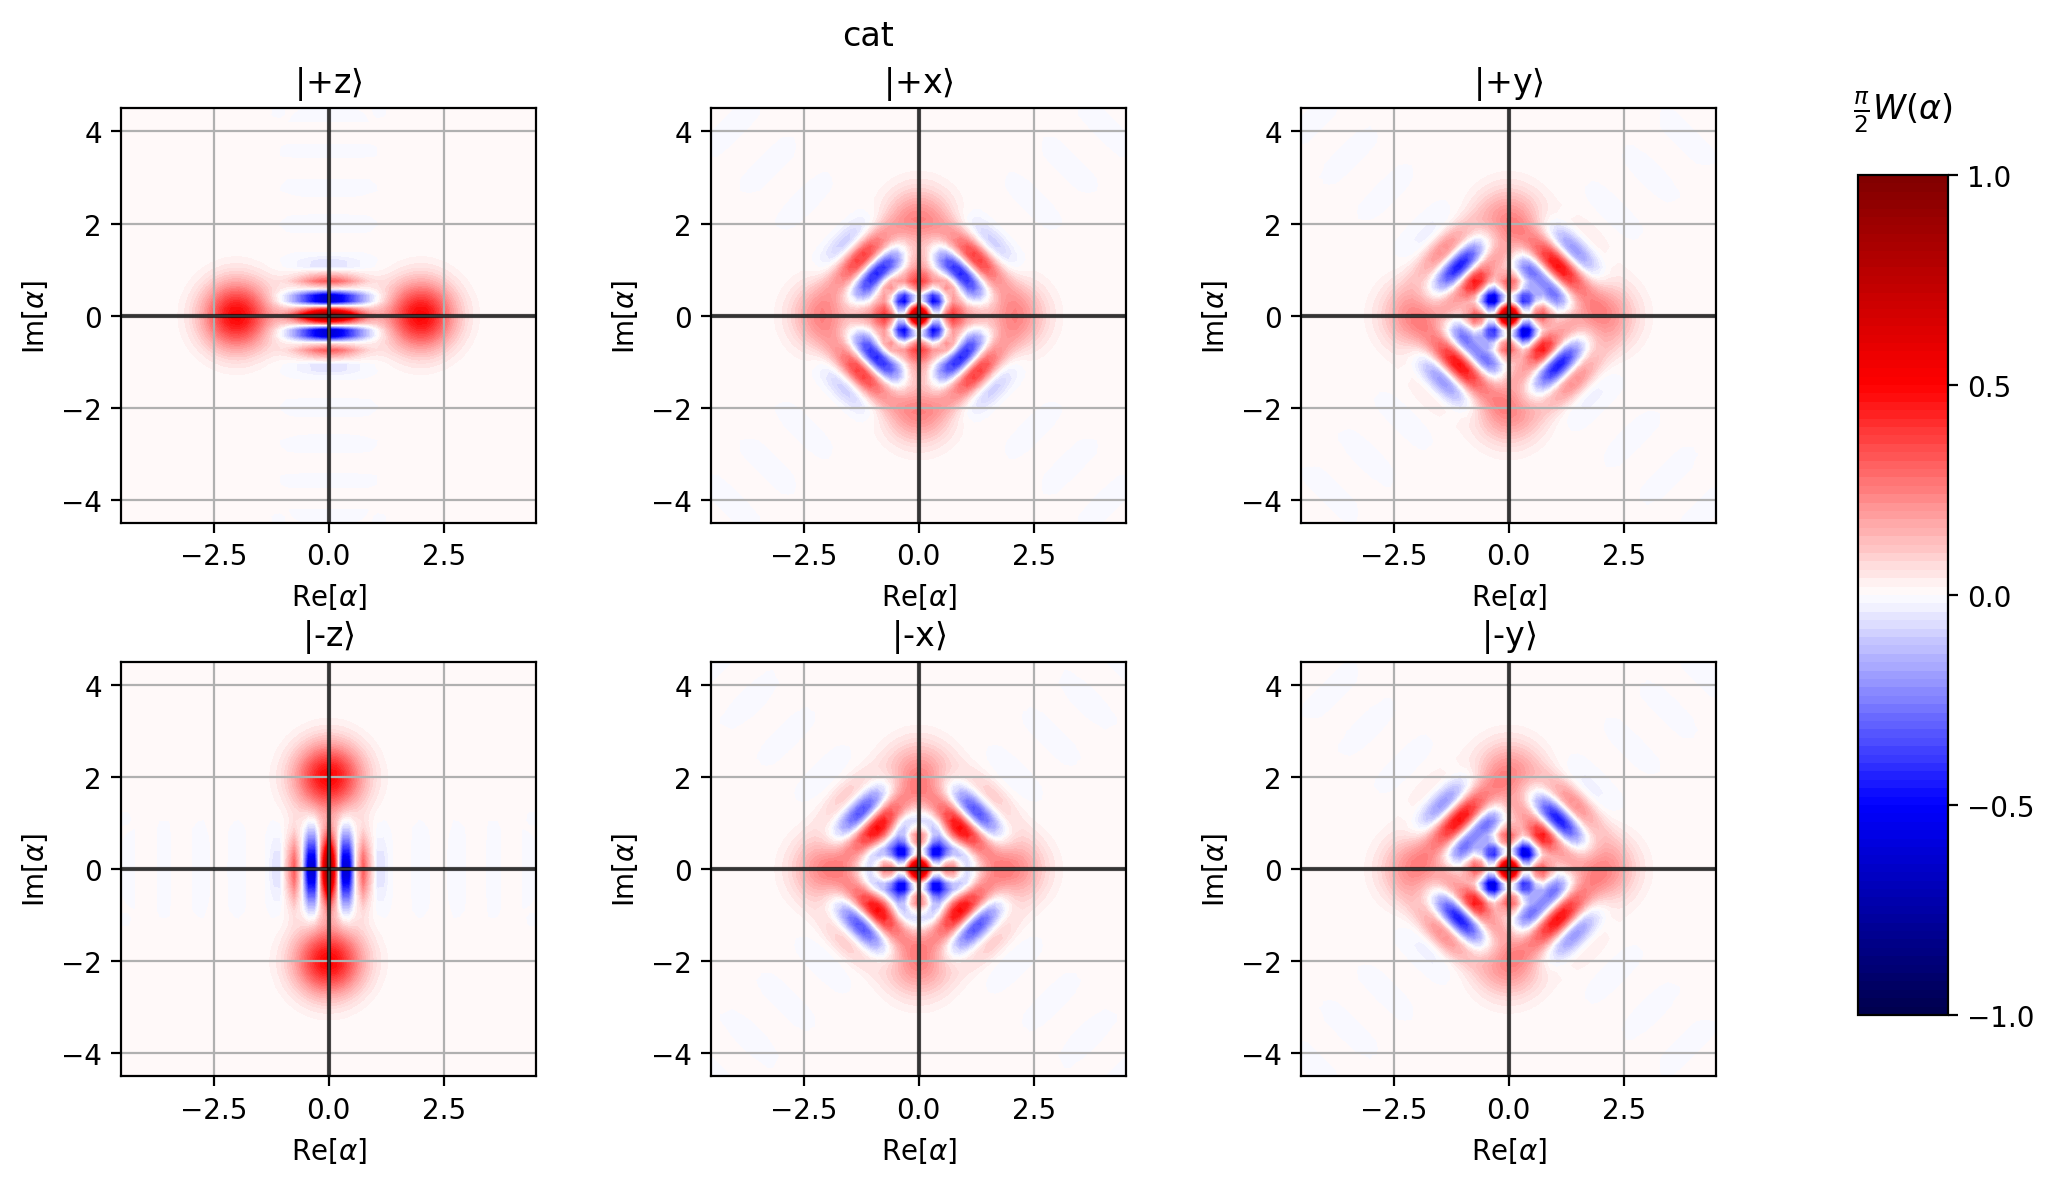

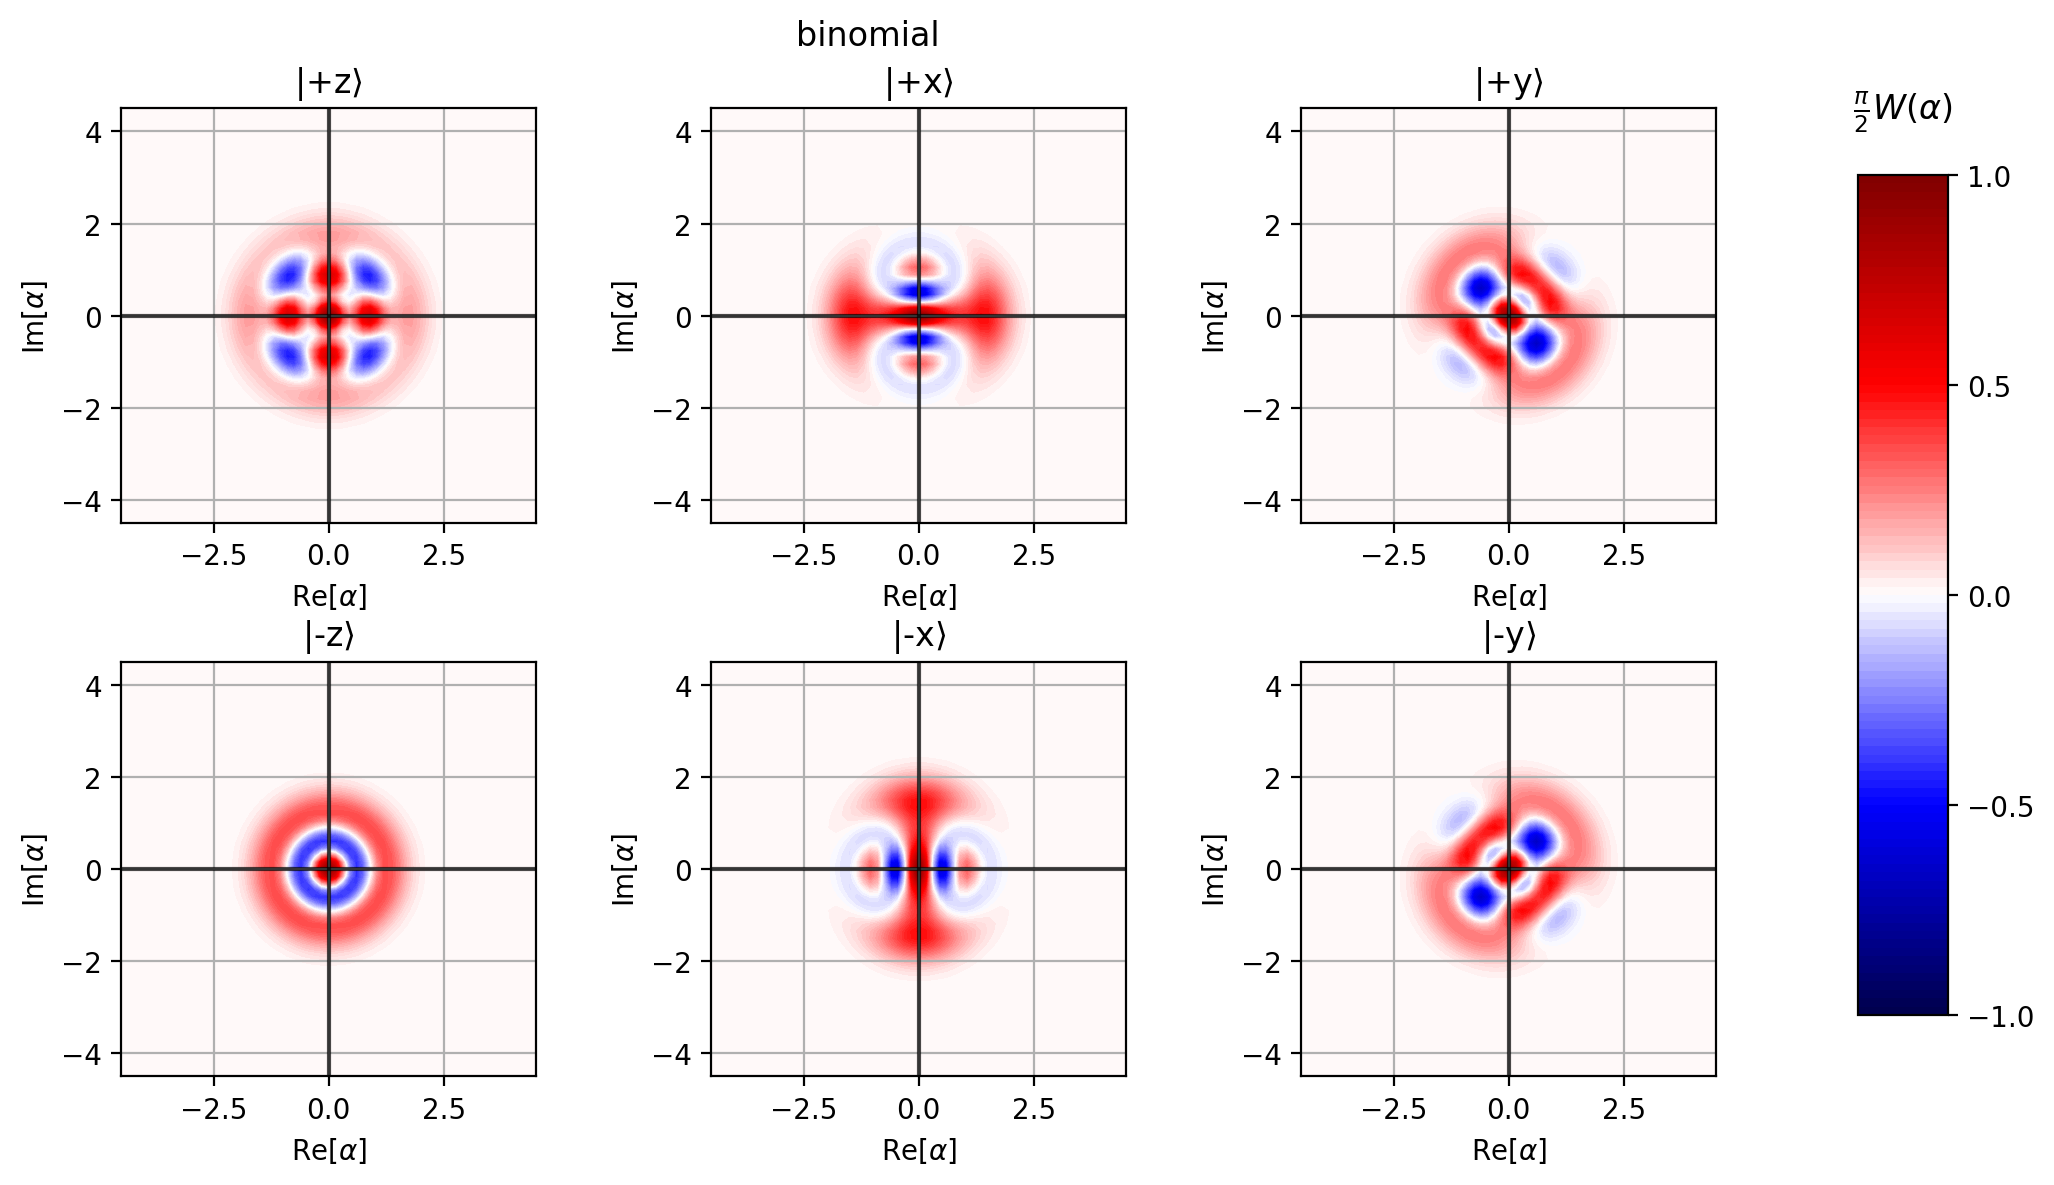

/Users/phionx/Github/qc/EQuS/bosonic/jax/bosonic/bosonic/codes/base.py:300: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


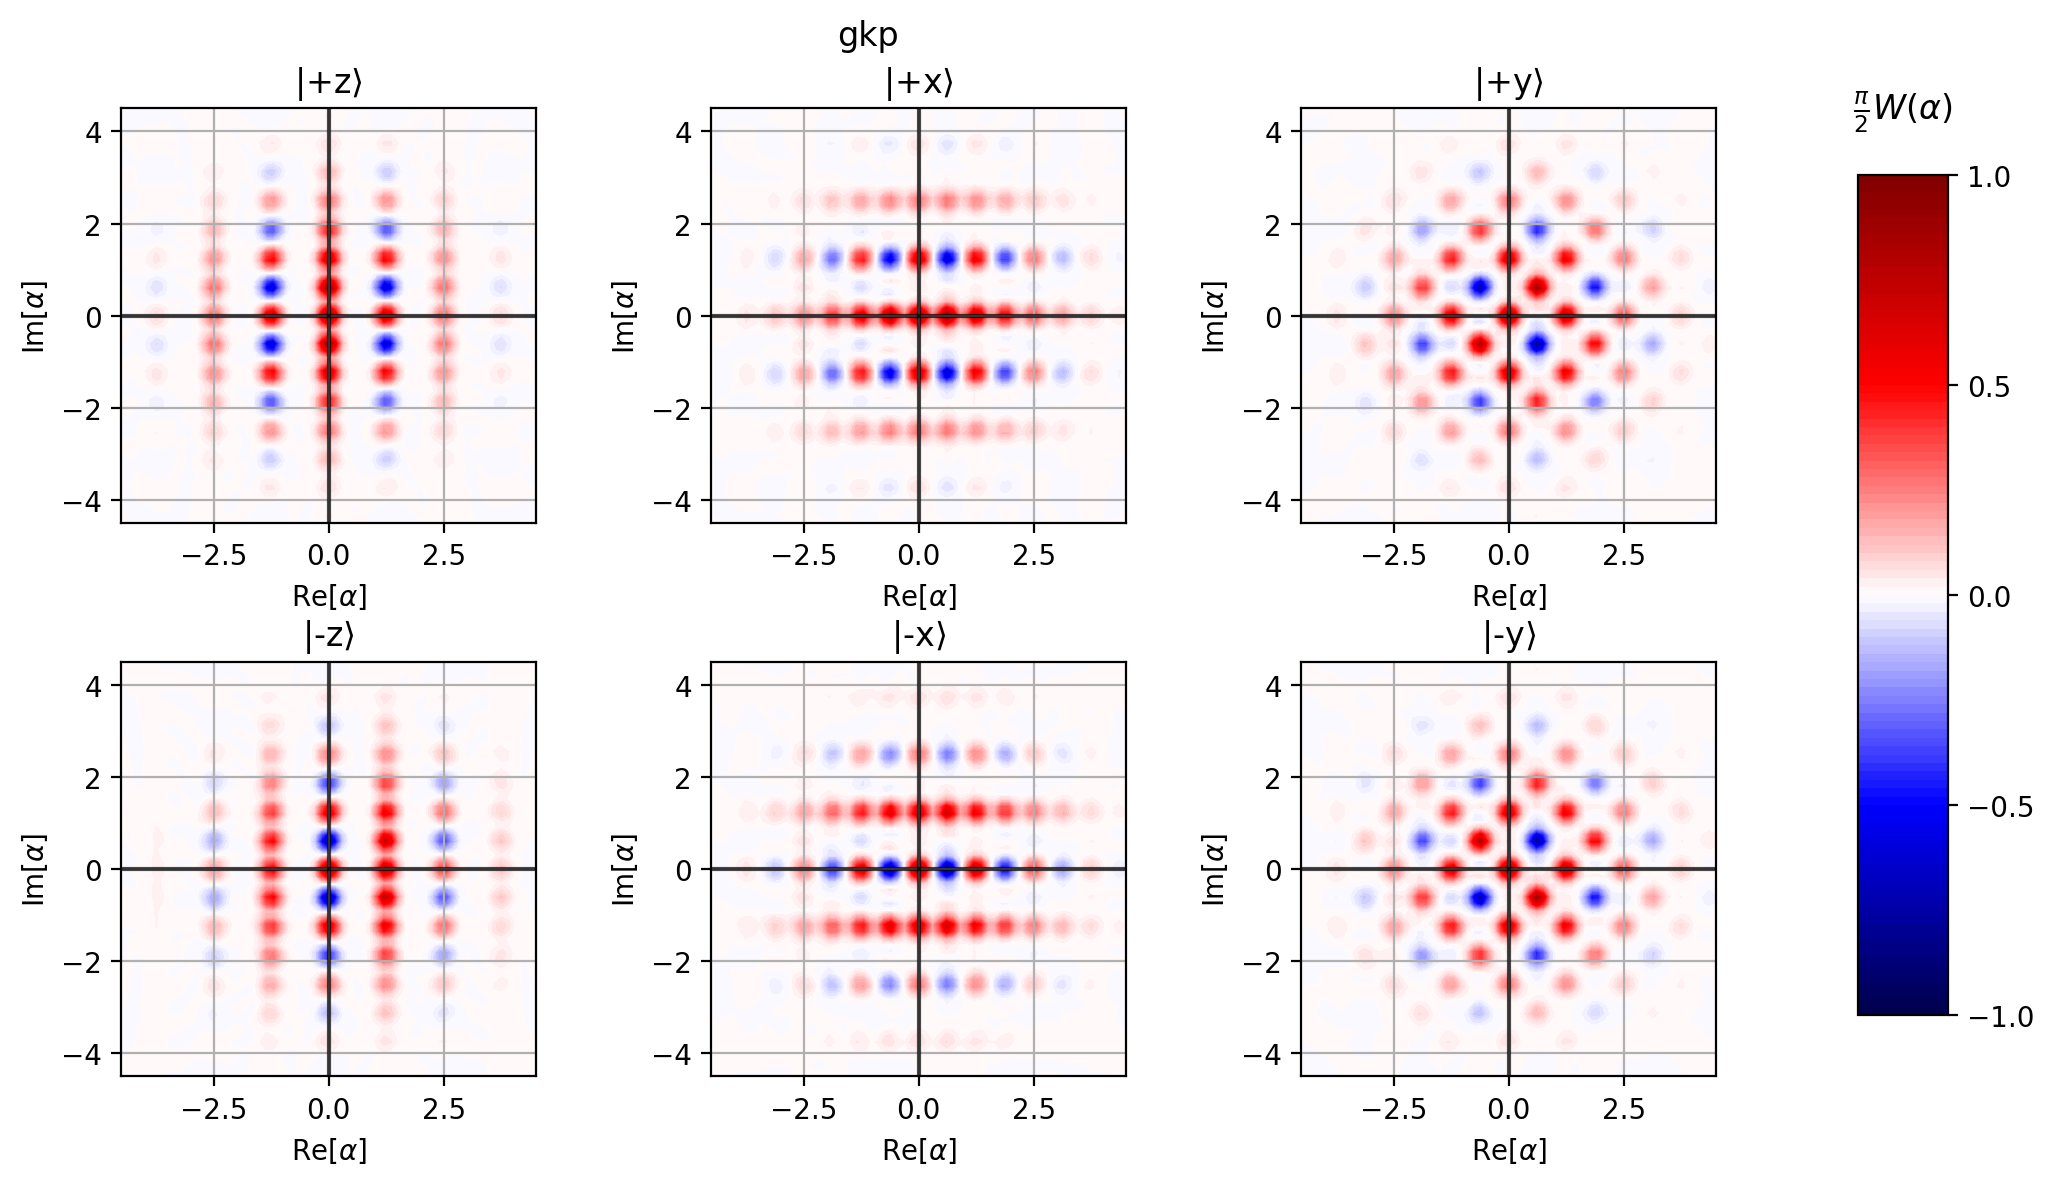

In [3]:
qubit = CatQubit()
qubit.plot_code_states()

qubit = BinomialQubit()
qubit.plot_code_states()

qubit = GKPQubit()
qubit.plot_code_states()

# Create Bosonic Circuit 

1.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.46 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


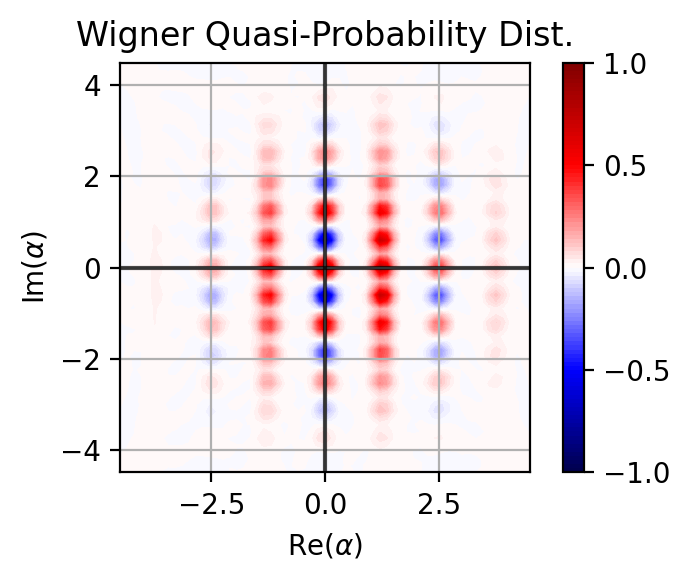

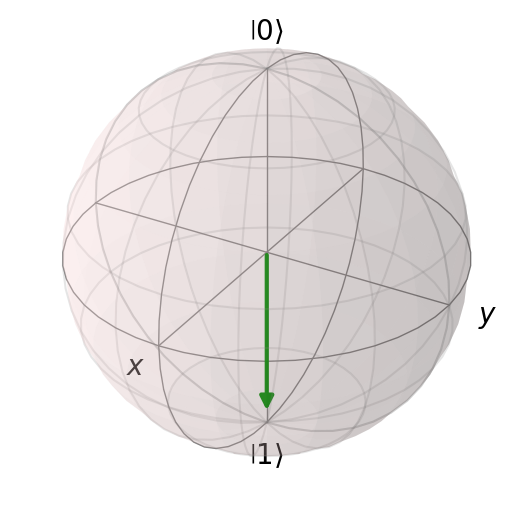

<Figure size 640x480 with 0 Axes>

In [4]:
# Circuit containing 1 cavity and 1 qubit
breg = BosonicRegister([GKPQubit(),Qubit()])
bcirc = BosonicCircuit(breg)

# set up circuit
bcirc.reset() # initialize each qubit in |+z>
bcirc.x(0) # added to gates list
bcirc.x(1) # added to gates list

%timeit -n1 -r1 results = execute(bcirc, "unitary_jax") # or "hamiltonian_jax"
%timeit results = execute(bcirc, "unitary_jax") # or "hamiltonian_jax"

results = execute(bcirc, "unitary_jax") # or "hamiltonian_jax"
results.plot(bcirc, 0)
results.plot(bcirc, 1)

# Custom Gates

2.94 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
957 ms ± 231 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


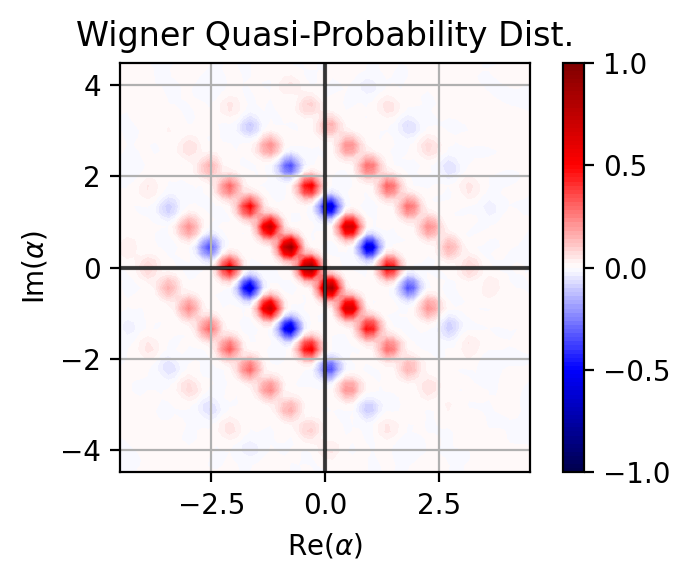

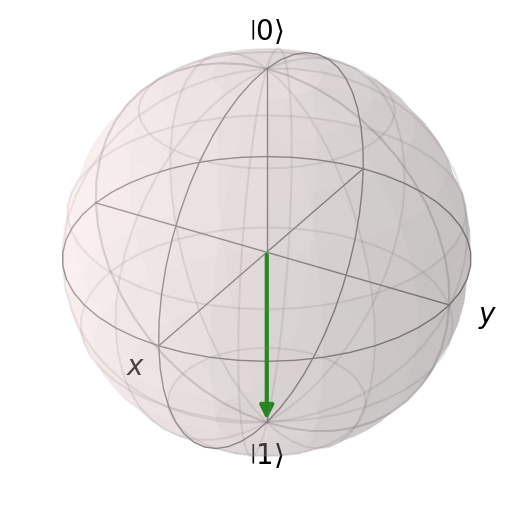

<Figure size 640x480 with 0 Axes>

In [5]:
breg = BosonicRegister([GKPQubit(),Qubit()]) # [q0,q1]
bcirc = BosonicCircuit(breg)

bcirc.x(1) # add an X Gate on q1
bcirc.add(PhaseRotationGate, 0, {"phi": np.pi/4}) 
bcirc.add(CDGate, (0,1), {"beta": 1}) # q0 is the control

%timeit -n1 -r1 results = execute(bcirc, "unitary_jax")
%timeit results = execute(bcirc, "unitary_jax")

results = execute(bcirc, "unitary_jax")
results.plot(bcirc, 0) # plot q0
results.plot(bcirc, 1) # plot q1

# Hamiltonian Simulation

100% |██████████| [00:01<00:00, 50.23%/s]
100% |██████████| [00:02<00:00, 34.22%/s]


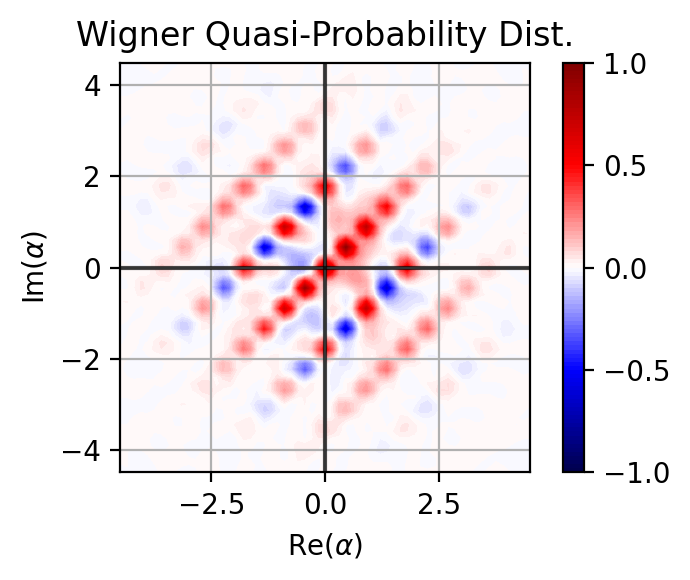

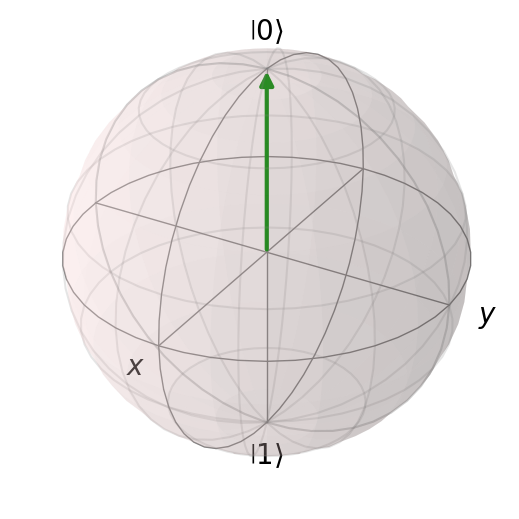

<Figure size 640x480 with 0 Axes>

In [6]:
N = 50

breg = BosonicRegister([GKPQubit({"N": N}),Qubit()]) # [q0,q1]
bcirc = BosonicCircuit(breg)

a = breg.bqubits[0].common_gates["a"] ^ jqt.identity(2)
a_dag = a.dag()

K = 2 * jnp.pi * 1
H0 = K/2 * a_dag @ a_dag @ a @ a

bcirc.add(PhaseRotationGate, 0, {"phi": np.pi/4}) 
bcirc.add(CDGate, (0,1), {"beta": 1}) 

results = execute(bcirc, "hamiltonian_jax", H0=H0)
results.plot(bcirc, 0) # plot q0
results.plot(bcirc, 1) # plot q1